In [1]:
# Copyright 2022 NVIDIA Corporation. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<img src="http://developer.download.nvidia.com/compute/machine-learning/frameworks/nvidia_logo.png" style="width: 90px; float: right;">

# The Making of RIVA German ASR Service

This notebook walks you through the step-by-step process that NVIDIA engineers employ to develop the Riva German ASR service, from raw transcribed audio data to a ready-to-serve Riva ASR service.

## Overview

The below diagram provides a high-level overview of the end-to-end engineering pipeline required to realize the Riva German ASR service.


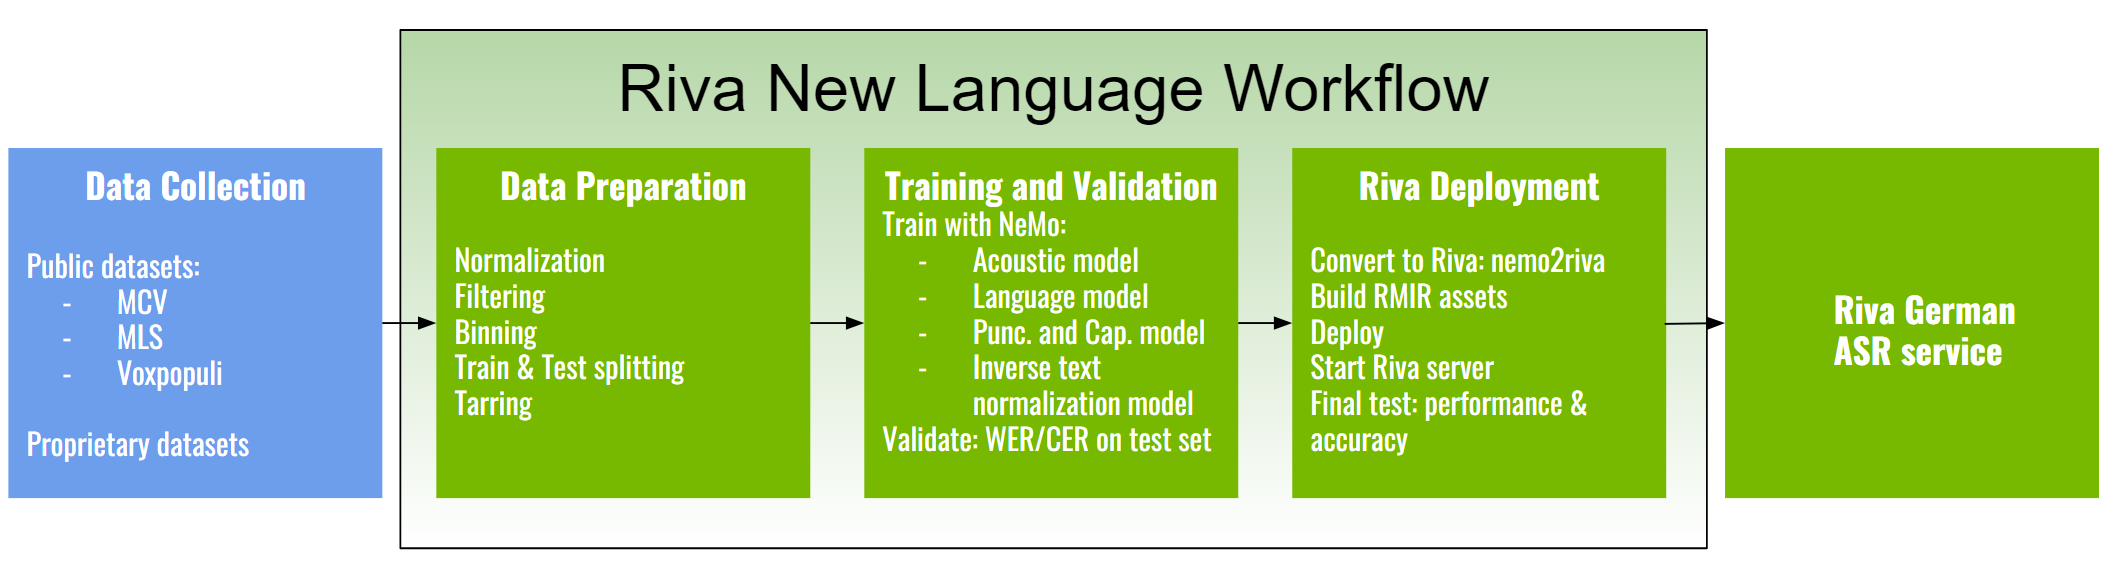

In [3]:
from IPython.display import Image
Image(filename='german-workflow.PNG')

The whole workflow is divided into 4 major stages:
- Data collection
- Data preparation
- Train and validation
- Riva deployment

In the next sections, we look deeper into each of these stages.

## 1. Data collection
When adapting Riva to a whole new language, a large amount of high-quality transcribed audio data is critical for training high-quality acoustic models. 

For German, there are several sources of public datasets that we can readily leverage:

- [Mozila Common Voice](https://commonvoice.mozilla.org/en/datasets) (MCV) corpus 7.0: 571 hours 
- [Multilingual LibriSpeech](http://www.openslr.org/94/) (MLS): 1918 hours
- [Voxpopuli](https://ai.facebook.com/blog/voxpopuli-the-largest-open-multilingual-speech-corpus-for-ai-translation-and-more/): 214 hours

The total amount of public datasets is thus ~2700 hours of transcribed German speech. In addition, to train Riva world-class models, we acquired many more hours of proprietary datasets.

## 2. Data preparation

The data preparation phase carries out preparation steps required to convert the diverse raw audio datasets into a format that can be efficiently digested by NVIDIA NeMo toolkit. These steps are:

### 2.1. Data normalization

Audio data acquired from various sources are inherently heterogenous (file format, sample rate, number of audio channels). Therefore, as a preprocessing step, we convert these audio data to a common format. 

Text Normalization converts text from written form into its verbalized form. It is used as a preprocessing step for preprocessing Automatic Speech Recognition (ASR) training transcripts. For German text normalization, we primarily leverage NeMo text normalization [library](https://github.com/NVIDIA/NeMo/tree/main/nemo_text_processing/text_normalization/de). In addition, we also Also tried to convert all outdated German word spellings to modern spelling.

Dataset ingestion scripts are used to convert the various datasets into the standard manifest format expected by NeMo.

### 2.2. Data cleaning/filtering

This step is carried out to filter out some outlying samples in the datasets. 

- Samples that are too long, too short or empty are filtered out.

- In addition, we also filter out samples that are considered 'noisy', that is, samples having very high WER/CER w.r.t. a previously trained German models. 


### 2.3. Binning

For training ASR models, audios with different lengths may be grouped into a batch. It would make it necessary to use paddings to make all the same length. These extra paddings is a significant source of computation waste. Splitting the training samples into buckets with different lengths and sampling from the same bucket for each batch would increase the computation efficicncy. It may result into training speeedup of more than 2X. 

We leverage NeMo conversion [script](https://github.com/NVIDIA/NeMo/blob/v1.0.2/scripts/speech_recognition/convert_to_tarred_audio_dataset.py) to carry out this step.

### 2.4. Train and Test splitting

This step is a staple of the any deep learning and machine learning development pipeline, to ensure that the model is learning to generalize without overfitting the training data.

### 2.5. Tarring

If experiments are run on a cluster with datasets stored on a distributed file system, the user will likely want to avoid constantly reading multiple small files and would prefer tarring their audio files. You can easily convert your existing NeMo-compatible ASR datasets using the conversion [script](https://github.com/NVIDIA/NeMo/blob/v1.0.2/scripts/speech_recognition/convert_to_tarred_audio_dataset.py).


## 3. Training and validation




## 4. Riva deployment